F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive\breast-cancer-wisconsin.data.txt
F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive\gender_classification_v7.csv
F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive\knn.ipynb
F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive\naivebayes.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64

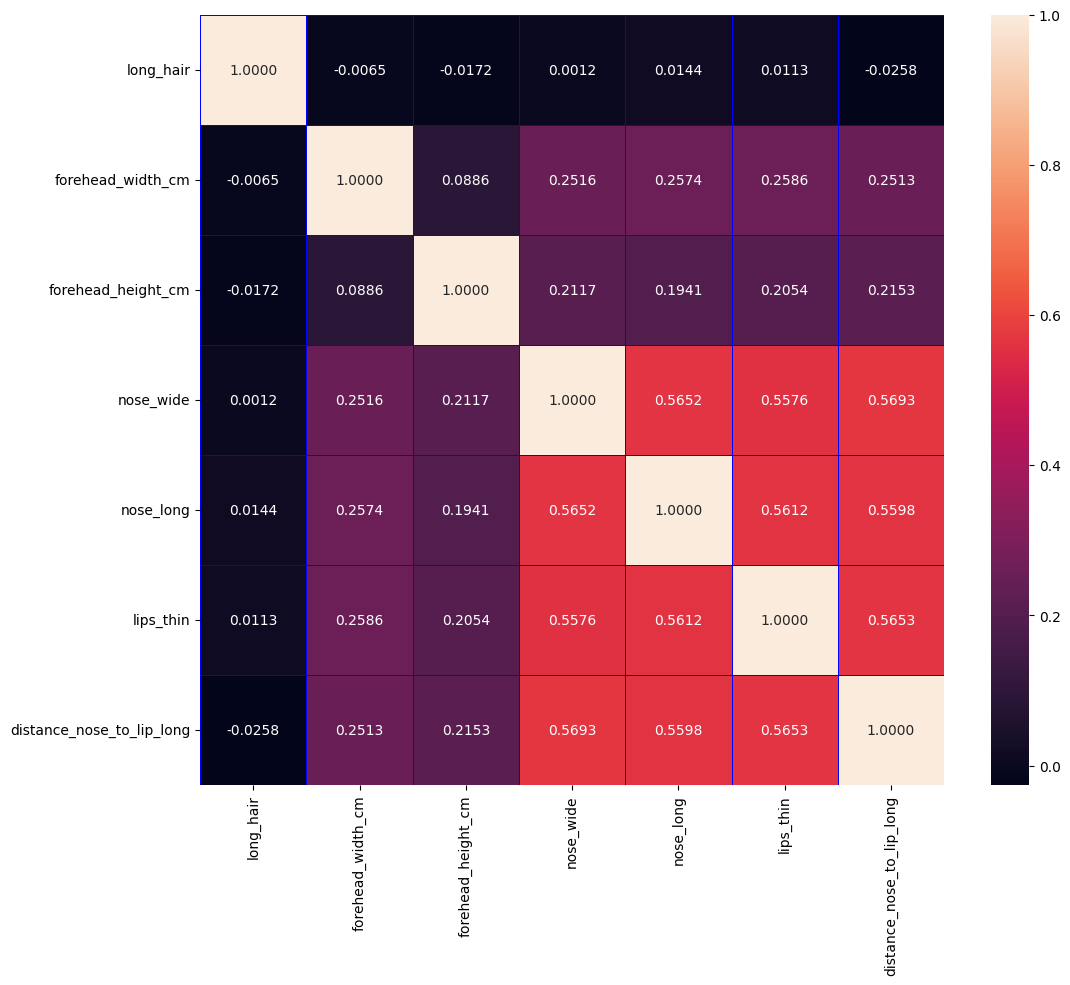

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g.pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# I read the dataset with the pandas library.
data = pd.read_csv("F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive/gender_classification_v7.csv")
data

# information of data
data.info()

# Data of values(Max, min, std...)
data.describe()

# Data Correlation: Relationship between columns
data.corr(numeric_only=True)

# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(numeric_only=True), annot = True, linewidths = 0.5,
linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

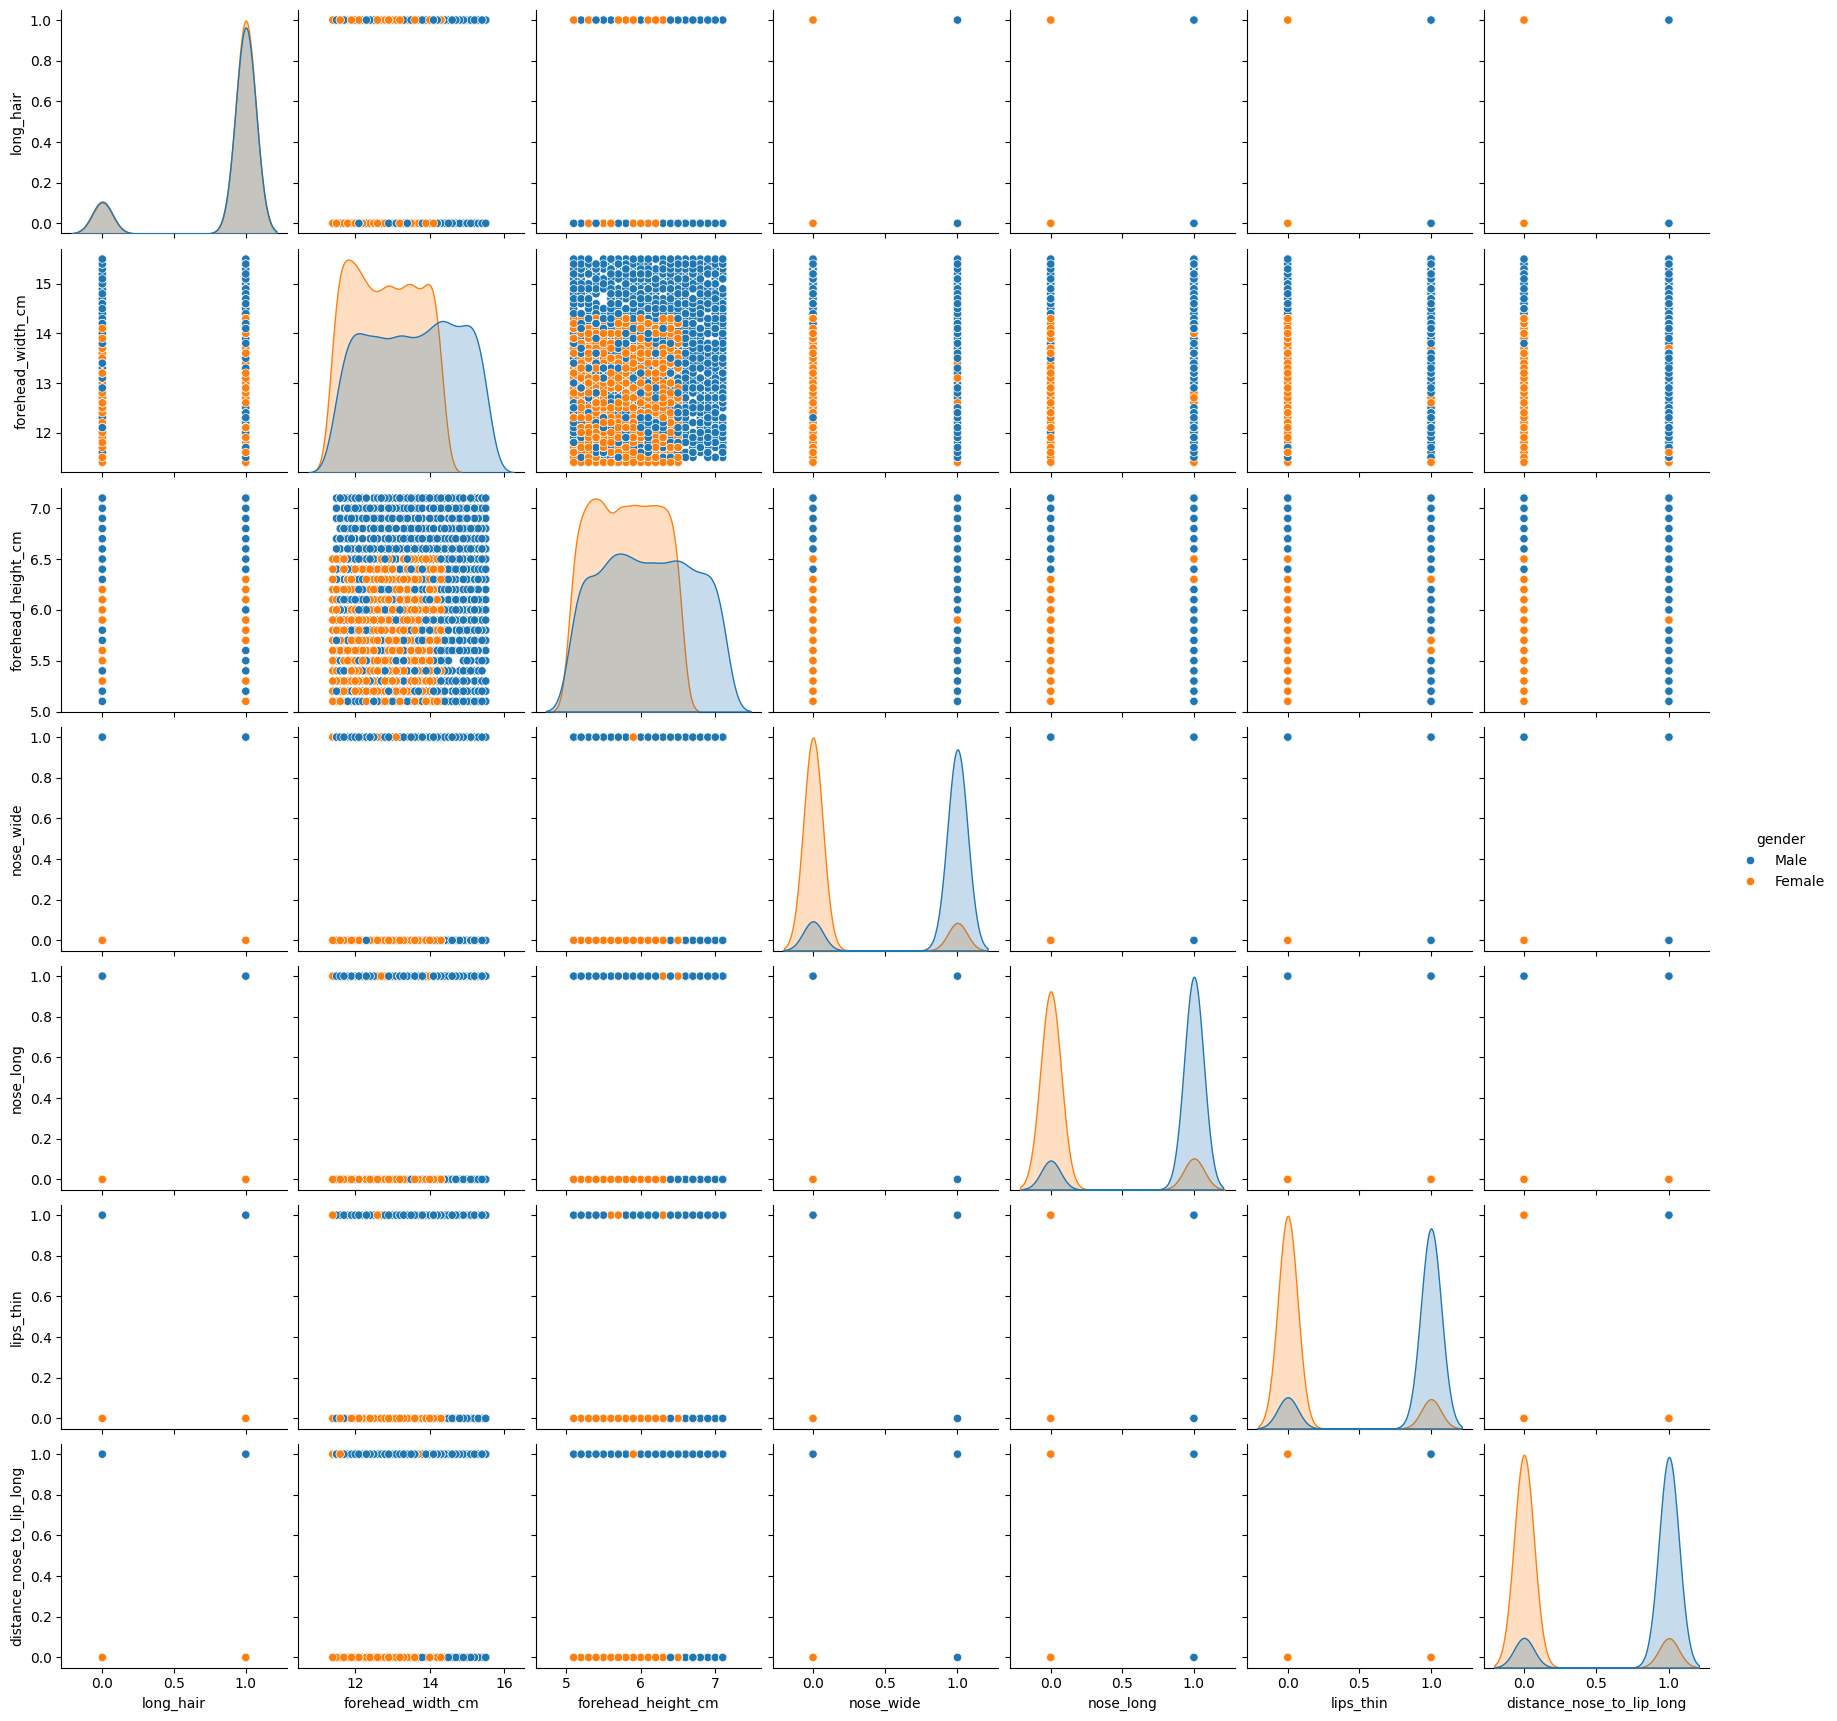

In [22]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(data, hue = "gender")

gender
Female    2501
Male      2500
Name: count, dtype: int64

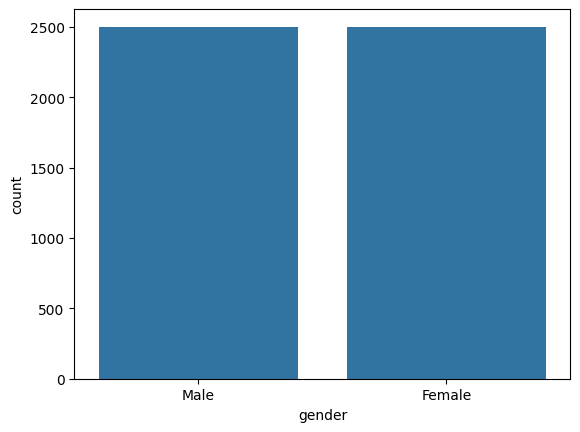

In [23]:
# Columns of data
data.columns

# The number of gender in the dataset and its graphic.
sns.countplot(x = "gender", data = data)
data.loc[:,"gender"].value_counts()

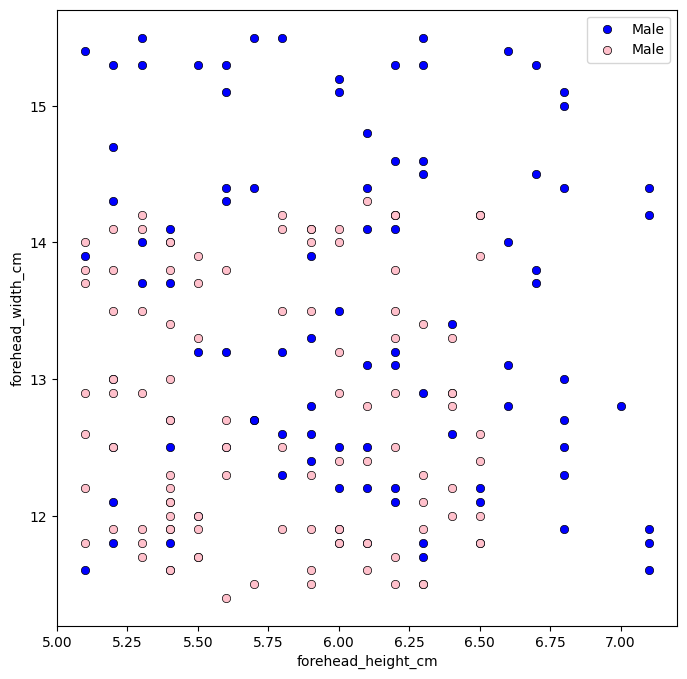

In [24]:
Male = data[data.gender == "Male"].iloc[:100,:]
Female = data[data.gender == "Female"].iloc[:100,:]
plt.figure(figsize = (8,8))
plt.scatter(Male.forehead_height_cm, Male.forehead_width_cm,
color = "blue", label = "Male", linewidths = 0.5, edgecolor =
"black")
plt.scatter(Female.forehead_height_cm,
Female.forehead_width_cm, color = "pink", label = "Male",
linewidths = 0.5, edgecolor = "black")
plt.xlabel("forehead_height_cm")
plt.ylabel("forehead_width_cm")
plt.legend()
plt.show()

In [25]:
# Read dataset
data_nbc = pd.read_csv("F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive/gender_classification_v7.csv")
data_nbc

# Change gender type
# Male : 1
# Female : 0
data_nbc.gender = [1 if i == "Male" else 0 for i in data_nbc.gender]
data_nbc

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [26]:
# x_data
x_data = data_nbc.drop(["gender"],axis = 1)
# y_data
y_data = data_nbc.gender.values
x_data
y_data
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=1)
# Gaussian Naïve Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print("print Train for accuracy of NBC algo: ",
gnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ",
gnb.score(x_test,y_test))
# Multinominal Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
print("print Train for accuracy of NBC algo: ",
mnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ",
mnb.score(x_test,y_test))
# Bernoulli Naïve Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
print("print Train for accuracy of NBC algo: ",
bnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ",
bnb.score(x_test,y_test))
# Complement Naïve Bayes
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(x_train, y_train)
print("print Train for accuracy of NBC algo: ",
cnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ",
cnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.97
print Test for accuracy of NBC algo:  0.9713524317121919
print Train for accuracy of NBC algo:  0.9565714285714285
print Test for accuracy of NBC algo:  0.960692871419054
print Train for accuracy of NBC algo:  0.9585714285714285
print Test for accuracy of NBC algo:  0.9640239840106596
print Train for accuracy of NBC algo:  0.9565714285714285
print Test for accuracy of NBC algo:  0.960692871419054
